# Using the FSMol Dataset

The `FSMolDataset` class provides access to the train/valid/test tasks of our few-shot learning dataset on molecules.

An instance is created from the data directory by `FSMolDataset.from_directory(/path/to/dataset)`.
The data in the `train`, `validation` and `test` folds of the dataset can be accessed using `FSMolDataset.get_task_reading_iterable`.
By default, this method simply reads in the individual data files using a number of background worker processes and provides them in a standard format, but this behavior can be customized by providing a specialized callback function.
The default implementation returns an iterable over `FSMolTask` objects, each containing an entire task's of single featurised molecules, `MoleculeDatapoint`. 

In [1]:
# Setting up local details:
import os
import sys

# This should be the location of the checkout of the FS-Mol repository:
FS_MOL_CHECKOUT_PATH = os.path.join(os.environ['HOME'], "work", "FS-Mol")
FS_MOL_DATASET_PATH = os.path.join(os.environ['HOME'], "work", "FS-Mol", "datasets", "fs-mol")

os.chdir(FS_MOL_CHECKOUT_PATH)
sys.path.insert(0, FS_MOL_CHECKOUT_PATH)

## Example: Creating FSMolDataset and Accessing a Task

First, we simply create a dataset and have a look at a single task:

In [2]:
from fs_mol.data import FSMolDataset, DataFold
dataset = FSMolDataset.from_directory(FS_MOL_DATASET_PATH)

valid_task_iterable = dataset.get_task_reading_iterable(DataFold.VALIDATION) # DataFold.VALIDATION, TRAIN, TEST
task = next(iter(valid_task_iterable))
print(task.name)

CHEMBL2218962


In [26]:
print( f'num of task: {dataset.get_num_fold_tasks(DataFold.VALIDATION)}',
      f'names of task: {dataset.get_task_names(DataFold.VALIDATION)}', sep='\n') # DataFold.VALIDATION, TRAIN, TEST

num of task: 40
names of task: ['CHEMBL1243966', 'CHEMBL1614110', 'CHEMBL1614202', 'CHEMBL1614213', 'CHEMBL1614259', 'CHEMBL1614432', 'CHEMBL1738510', 'CHEMBL1963790', 'CHEMBL1963930', 'CHEMBL1964107', 'CHEMBL2218962', 'CHEMBL2219032', 'CHEMBL2219038', 'CHEMBL2219137', 'CHEMBL2219144', 'CHEMBL2219168', 'CHEMBL2219172', 'CHEMBL2219185', 'CHEMBL2219206', 'CHEMBL2219253', 'CHEMBL2219259', 'CHEMBL2219276', 'CHEMBL2219277', 'CHEMBL2219292', 'CHEMBL2219319', 'CHEMBL2219323', 'CHEMBL2219332', 'CHEMBL2219344', 'CHEMBL2219383', 'CHEMBL2354206', 'CHEMBL3705467', 'CHEMBL3705631', 'CHEMBL3705869', 'CHEMBL3705880', 'CHEMBL3706064', 'CHEMBL3706088', 'CHEMBL3882760', 'CHEMBL3888867', 'CHEMBL4260657', 'CHEMBL763161']


A task, by default, is simply a name and a list of datapoints, each stored as a `MoleculeDatapoint`, a dataclass with the following definition:

```python
@dataclass(frozen=True)
class MoleculeDatapoint:
    """Data structure holding information for a single molecule.

    Args:
        task_name: String describing the task this datapoint is taken from.
        smiles: SMILES string describing the molecule this datapoint corresponds to.
        graph: GraphData object containing information about the molecule in graph representation
            form, according to featurization chosen in preprocessing.
        numeric_label: numerical label (e.g., activity), usually measured in the lab. (unit: nM see the fs_mol/preprocessing/clean.py:L111)
        bool_label: bool classification label, usually derived from the numeric label using a
            threshold.
        fingerprint: optional ECFP for the molecule.
        descriptors: optional phys-chem descriptors for the molecule.
    """

    task_name: str
    smiles: str
    graph: GraphData
    numeric_label: float
    bool_label: bool
    fingerprint: Optional[np.ndarray]
    descriptors: Optional[np.ndarray]
```

In [27]:
type(task.samples[0])

fs_mol.data.fsmol_task.MoleculeDatapoint

In [4]:
sample = task.samples[0]

In [44]:
sample.__dict__.keys()

dict_keys(['task_name', 'smiles', 'graph', 'numeric_label', 'bool_label', 'fingerprint', 'descriptors'])

CHEMBL2218962, B, Nc1ncnc2c1c(-c1ccc(Oc3ccccc3)cc1)cn2C1CCCC1, False,  -1.0
CHEMBL2219032, B, O=C1Nc2ccc(-c3cccnc3)cc2C1=Cc1ccc[nH]1, False,  -5.0
CHEMBL2219038, B, COc1cc2nccc(Oc3ccc(NC(=O)Nc4cc(C)on4)c(Cl)c3)c2cc1OC, False,  -3.0
CHEMBL2219168, B, O=C1NC(=O)C(c2c[nH]c3ccccc23)=C1c1c[nH]c2ccccc12, False,  0.0
CHEMBL2219168, B, Cn1cc(/C=C2\C(=O)Nc3ccc(S(N)(=O)=O)cc32)c2ccccc21, False,  0.0
CHEMBL2219168, B, O=C1NC(=O)C(c2cn(CCCn3ccnc3)c3ccccc23)C1=Nc1ccccc1, False,  -1.0
CHEMBL2219168, B, Cn1c2ccccc2c2c3c(c4c5ccccc5n(CCC#N)c4c21)CNC3=O, False,  -1.0
CHEMBL2219168, B, COc1ccc2c(c1)c(C1=C(c3c[nH]c4ccccc34)C(=O)NC1=O)cn2CCCN(C)C, False,  -2.0
CHEMBL2219168, B, O=C1Nc2ccc3ncsc3c2C1=Cc1c[nH]cn1, False,  -1.0
CHEMBL2219168, B, CO[C@@H]1[C@H](N(C)C(=O)c2ccccc2)C[C@H]2O[C@]1(C)n1c3ccccc3c3c4c(c5c6ccccc6n2c5c31)C(=O)NC4, False,  0.0
CHEMBL2219168, B, CN(C)CCCn1cc(C2=C(c3c[nH]c4ccccc34)C(=O)NC2=O)c2ccccc21, False,  -1.0
CHEMBL2219168, B, CN[C@@H]1C[C@H]2O[C@@](C)([C@@H]1OC)n1c3ccccc3c3c4c(c5c6cc

<AxesSubplot:>

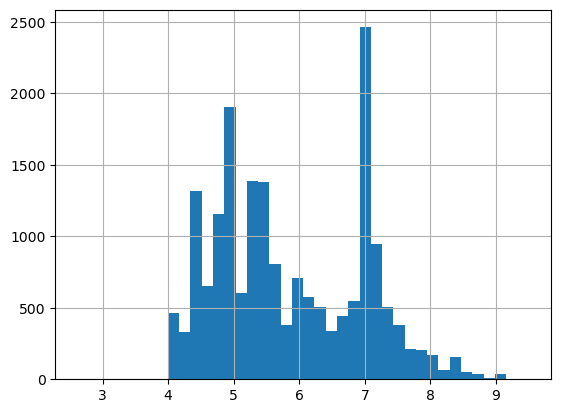

In [13]:
import pandas as pd
import numpy as np
num_lab_li = []
at_li = []
name_li = []
for task in dataset.get_task_reading_iterable(DataFold.VALIDATION):
    for sample in task.samples:
        if sample.numeric_label > 0 :
            num_lab_li.append(sample.numeric_label)
            at_li.append(sample.assay_type)
            name_li.append(sample.task_name)
        else:
            print(f'{sample.task_name}, {sample.assay_type}, {sample.smiles}, {sample.bool_label},  {sample.numeric_label}')
pd.Series(9-np.log10(np.array(num_lab_li))).hist(bins = 40)

In [7]:
sample.graph.__dict__.keys()

dict_keys(['node_features', 'adjacency_lists', 'edge_features'])

In [12]:
print(len(sample.graph.adjacency_lists))
sample.graph.adjacency_lists[0] # SINGLE BONDS AS PAIRS
sample.graph.adjacency_lists[1] # DOUBLE BONDS AS PAIRS
sample.graph.adjacency_lists[2] # TRIPLE BONDS AS PAIRS

# 이미 preprocessing 된게 파일로 저장돼있다.

3


array([], shape=(0, 2), dtype=int64)

## Example: Making a Task Sample

In practice, all methods require that we sample from the `FSMolTask`s, for example during evaluation.
To this end, we have implemented a number of samplers, extensions of the `TaskSampler` abstract class, which provides a unified `sample` method.
The baseline models implemented in this repository use stratified sampling (implemented in `StratifiedTaskSampler`), but `RandomTaskSampler` and `BalancedTaskSampler` exist as alternatives.

In practice, sampling often requires additional parameters, such as a minimal support set size, a minimal query set size, or an upper desired query set size. When a task dataset cannot be sampled using these parameters (e.g., because it's too small), a `SamplingException` exception is thrown and the caller can decide how to handle this. For example, during training, it is often reasonable to simply ignore such exceptions and pass over failure cases.

In [15]:
from fs_mol.data import StratifiedTaskSampler
task_sampler = StratifiedTaskSampler(
    train_size_or_ratio = 60, # default: 16
    valid_size_or_ratio = 0.0,
    test_size_or_ratio = 256, 
    allow_smaller_test = True
)

Applying a sampler returns a sample from the task, which contains a support/train set, validation set, and query/test set. In this case, the task is too small to return all requested testing samples, so it returns the maximum available.

In [16]:
task_sample = task_sampler.sample(task, seed=0)

print(f"Number of samples in task: {len(task.samples)}")
print(f"Number of train samples: {len(task_sample.train_samples)}")
print(f"Number of test samples: {len(task_sample.test_samples)}")
print(f"Number of valid samples: {len(task_sample.valid_samples)}")

Number of samples in task: 201
Number of train samples: 60
Number of test samples: 141
Number of valid samples: 0


The samplers are built such that using the same seed will always return the same data split:

In [6]:
task_sample_0 = task_sampler.sample(task, seed=0)
task_sample_1 = task_sampler.sample(task, seed=1)

print(f"Task sample, seed 0, first call  - First training SMILES {task_sample.train_samples[0].smiles}")
print(f"Task sample, seed 0, second call - First training SMILES {task_sample_0.train_samples[0].smiles}")
print(f"Task sample, seed 1, first call  - First training SMILES {task_sample_1.train_samples[0].smiles}")

Task sample, seed 0, first call  - First training SMILES O=C(CNC(=O)c1ccc(Cl)cc1)OC(C(=O)Nc1cc(C(F)(F)F)ccc1Cl)c1ccccc1
Task sample, seed 0, second call - First training SMILES O=C(CNC(=O)c1ccc(Cl)cc1)OC(C(=O)Nc1cc(C(F)(F)F)ccc1Cl)c1ccccc1
Task sample, seed 1, first call  - First training SMILES CNc1oc(C=Cc2cc(OC)c(OC)c(OC)c2)nc1C#N


## Example: Custom Task Reading Functions in MAML

When implementing models on top of FS-Mol, it is often useful to specialize the callback used in `get_task_reading_iterable`, for example to directly draw appropriate samples or do further featurization.

In MAML, we for example need to use stratified samples in each training step:

```python
task_sampler = StratifiedTaskSampler(
    train_size_or_ratio=train_size,
    valid_size_or_ratio=0,
    test_size_or_ratio=(min_test_size, test_size),
)

def read_and_sample_from_task(paths: List[RichPath], id: int) -> Iterable[FSMolTaskSample]:
    for i, path in enumerate(paths):
        task = FSMolTask.load_from_file(path)
        yield task_sampler.sample(task, seed=id + i)

train_task_samples = dataset.get_task_reading_iterable(
    data_fold=DataFold.TRAIN, task_reader_fn=read_and_sample_from_task
)
```

In this instance, `train_task_samples` will now be an `Iterable` of sampled tasks.

## Batching Task Samples

The `fs_mol.data` package also provides infrastructure for minibatching, using the `FSMolBatcher` class.
These are framework-agnostic, and are used both for TensorFlow (in our MAML baseline) and Torch (in our MAT and Multitask baselines).
Concretely, an `FSMolBatcher` object can be used to turn a list of datapoints into a sequence of minibatches.
Our graph models handle batches of graphs as a single graph in which the samples appear as disconnected components. This is already implemented by our default implementation of `FSMolBatcher`, and so consumers only need to provide thing extensions.

### Example: GNN Multitask Batching

As example, consider the GNN Multitask model (see `fs_mol/data/multitask.py` for full code), which needs to include the task ID for each sample. To do this, we extend the `FSMolBatcher` class using the callback hooks for initializing, extending and finalizing a batch:

```python
def multitask_batcher_init_fn(batch_data: Dict[str, Any]):
    batch_data["sample_to_task_id"] = []

def multitask_batcher_add_sample_fn(
    batch_data: Dict[str, Any],
    sample_id: int,
    sample: MoleculeDatapoint,
    task_name_to_id: Dict[str, int],
):
    batch_data["sample_to_task_id"].append(task_name_to_id[sample.task_name])

def multitask_batcher_finalizer_fn(
    batch_data: Dict[str, Any]
) -> Tuple[FSMolMultitaskBatch, np.ndarray]:
    plain_batch = fsmol_batch_finalizer(batch_data)
    return (
        FSMolMultitaskBatch(
            sample_to_task_id=np.stack(batch_data["sample_to_task_id"], axis=0),
            **dataclasses.asdict(plain_batch),
        ),
        np.stack(batch_data["bool_labels"], axis=0),
    )

def get_multitask_batcher(
    task_name_to_id: Dict[str, int],
    max_num_graphs: Optional[int] = None,
    max_num_nodes: Optional[int] = None,
    max_num_edges: Optional[int] = None,
) -> FSMolBatcher[FSMolMultitaskBatch, np.ndarray]:
    return FSMolBatcher(
        max_num_graphs=max_num_graphs,
        max_num_nodes=max_num_nodes,
        max_num_edges=max_num_edges,
        init_callback=multitask_batcher_init_fn,
        per_datapoint_callback=partial(
            multitask_batcher_add_sample_fn, task_name_to_id=task_name_to_id
        ),
        finalizer_callback=multitask_batcher_finalizer_fn,
    )
```

This batcher is then used to create batches of up to `num_chunked_tasks` loaded in parallel as follows:

```python
def paths_to_mixed_samples(
    paths: List[RichPath], idx: int
) -> Iterable[Tuple[FSMolMultitaskBatch, np.ndarray]]:
    loaded_samples: List[MoleculeDatapoint] = []
    for i, path in enumerate(paths):
        task = FSMolTask.load_from_file(path)
        task_sample = self._task_sampler.sample(task, seed=idx + i)
        loaded_samples.extend(task_sample.train_samples)
    if self._data_fold == DataFold.TRAIN:
        np.random.shuffle(loaded_samples)

    for features, labels in self._batcher.batch(loaded_samples):
        yield features, labels

task_iterable = self._dataset.get_task_reading_iterable(
    data_fold=self._data_fold,
    task_reader_fn=paths_to_mixed_samples,
    reader_chunk_size=self._num_chunked_tasks,
)
```

### Example: MAML Batching

We can similarly use this from a Tensorflow model, namely our MAML implementation (see `fs_mol/data/maml.py`). Here, we created a `TFGraphBatchIterable` class that uses a `FSMolBatcher` using a customized `finalizer_callback` to produce a batch suitable for consumption in our model:

In [7]:
from fs_mol.data.maml import TFGraphBatchIterable
batched_data = TFGraphBatchIterable(
    samples=task_sample.train_samples,
    shuffle=True,
    max_num_nodes=100,
)

print(next(iter(batched_data)))

({'node_features': array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 1.],
       [0., 0., 1., ..., 1., 0., 1.]], dtype=float32), 'node_to_graph_map': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32), 'num_graphs_in_batch': 3, 'adjacency_list_0': array([[ 1,  2],
       [ 2,  3],
       [ 3,  4],
       [ 4,  6],
       [ 7,  8],
       [ 9, 10],
       [ 9, 11],
       [ 1, 13],
       [13, 14],
       [14, 15],
       [15, 17],
       [17, 18],
       [19, 20],
       [20, 21],
       [21, 22],
       [21, 23],
       [21, 24],
       [25, 26],
       [27, 28],
       [14, 29],
       [30, 31],
       [